# Nome: Lívia Karoline de Freitas Carlos RA:772287

# 🧠 Exercício: Visualização de Letras de Músicas com Redução de Dimensionalidade

Neste exercício, você irá trabalhar com um subconjunto de letras de músicas para explorar diferentes técnicas de redução de dimensionalidade: **PCA**, **t-SNE** e **Random Projection**. O objetivo é gerar representações 2D dessas letras e visualizar como cada técnica projeta os dados.

---

## ✅ Passo 1: Carregue os dados

Carregue o arquivo `musicas_subsampled.csv`, que deve conter as colunas:

- `nome_musica`
- `artista`
- `ano`
- `letra`

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
base = pd.read_csv('musicas_subsampled.csv')
base

,ano,nome_musica,artista,letra
0,1976,"Nem Ouro, Nem Prata",Ruy Maurity,"Eu vi chover, eu vi relampear\nMas mesmo assim..."
1,1980,"Bola de Meia, Bola de Gude",Milton Nascimento,"Há um menino, há um moleque\nMorando sempre no..."
2,1993,Have I Told You Lately,Rod Stewart,Have I told you lately that I love you?\nHave ...
3,1970,Little Woman,McFly,She was a quiet little woman\nBut no one reall...
4,2004,Samba Makossa,Charlie Brown Jr.,"Minha família, quer tudo como quem não quer na..."
...,...,...,...,...
495,2004,Você Me Vira a Cabeça (Me Tira do Sério),Alcione,"Você me vira a cabeça, me tira do sério\nDestr..."
496,1958,An Affair To Remember,Nat King Cole,Our love affair is a wondrous thing\nThat we'l...
497,1976,Tu T'en Vas,Alain Barrière,Tu t'en vas\nEt dans mon cœur ce n'est rien\nQ...
498,2012,Diamonds,Sam Smith,"(Diamonds, diamonds, diamonds, diamonds)\n(Dia..."


---
## ✅ Passo 2: Transforme as letras em vetores binários

Utilize `TfidfVectorizer` com `binary=True` para criar uma matriz de presença/ausência de palavras nas letras.

    from sklearn.feature_extraction.text import TfidfVectorizer
    import pandas as pd

    vectorizer = TfidfVectorizer(lowercase=True, binary=True)
    X = vectorizer.fit_transform(df['letra'].fillna(''))
    X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

---

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
base['letra'] = base['letra'].fillna('')

In [5]:
vectorizer = TfidfVectorizer(lowercase=True, binary=True)
X = vectorizer.fit_transform(base['letra'])

In [6]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [7]:
X_df

,10,100,12,14,15,18,182,1904,1910,20,...,전에,점점,참진,터뜨려,터뜨리고,터져,터지길,터질,테니,홀릴
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
## ✅ Passo 3: Separe os metadados das features

Crie um novo `DataFrame` com os dados originais e as features numéricas geradas.

    df_bin = pd.concat([df[['nome_musica', 'artista', 'ano']].reset_index(drop=True), X_df], axis=1)
    features = df_bin.drop(columns=['nome_musica', 'artista', 'ano'])

---

In [9]:
df_bin = pd.concat([base[['nome_musica', 'artista', 'ano']].reset_index(drop=True), X_df], axis=1)
df_bin

,nome_musica,artista,ano,10,100,12,14,15,18,182,...,전에,점점,참진,터뜨려,터뜨리고,터져,터지길,터질,테니,홀릴
0,"Nem Ouro, Nem Prata",Ruy Maurity,1976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Bola de Meia, Bola de Gude",Milton Nascimento,1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Have I Told You Lately,Rod Stewart,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Little Woman,McFly,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Samba Makossa,Charlie Brown Jr.,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Você Me Vira a Cabeça (Me Tira do Sério),Alcione,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,An Affair To Remember,Nat King Cole,1958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,Tu T'en Vas,Alain Barrière,1976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,Diamonds,Sam Smith,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
features = df_bin.drop(columns=['nome_musica', 'artista', 'ano'])
features

,10,100,12,14,15,18,182,1904,1910,20,...,전에,점점,참진,터뜨려,터뜨리고,터져,터지길,터질,테니,홀릴
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
## ✅ Passo 4: Aplique PCA

Utilize `PCA` do `sklearn.decomposition` para reduzir a dimensionalidade das features para 2 componentes principais.

    from sklearn.decomposition import PCA

    pca = PCA(n_components=2, random_state=42)
    df_bin['pca_1'], df_bin['pca_2'] = pca.fit_transform(features).T

---

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(features)

In [13]:
df_bin['pca_1'], df_bin['pca_2'] = pca_components.T

In [14]:
df_bin[['nome_musica', 'artista', 'ano', 'pca_1', 'pca_2']].head()

,nome_musica,artista,ano,ano,pca_1,pca_2
0,"Nem Ouro, Nem Prata",Ruy Maurity,1976,0.137086,-0.145855,0.039705
1,"Bola de Meia, Bola de Gude",Milton Nascimento,1980,0.000000,-0.163507,0.015707
2,Have I Told You Lately,Rod Stewart,1993,0.000000,0.188386,0.004237
3,Little Woman,McFly,1970,0.000000,0.136585,0.099212
4,Samba Makossa,Charlie Brown Jr.,2004,0.000000,-0.165881,0.037928


---
## ✅ Passo 5: Aplique t-SNE

Utilize `TSNE` do `sklearn.manifold` com 2 dimensões para obter uma projeção alternativa.

    from sklearn.manifold import TSNE

    tsne = TSNE(n_components=2, random_state=42)
    df_bin['tsne_1'], df_bin['tsne_2'] = tsne.fit_transform(features).T

---

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(features)

In [17]:
df_bin['tsne_1'], df_bin['tsne_2'] = tsne_components.T

In [18]:
df_bin[['nome_musica', 'artista', 'ano', 'tsne_1', 'tsne_2']].head()

,nome_musica,artista,ano,ano,tsne_1,tsne_2
0,"Nem Ouro, Nem Prata",Ruy Maurity,1976,0.137086,1.684568,-2.710449
1,"Bola de Meia, Bola de Gude",Milton Nascimento,1980,0.000000,0.399026,-2.151888
2,Have I Told You Lately,Rod Stewart,1993,0.000000,-0.640247,0.577839
3,Little Woman,McFly,1970,0.000000,2.459436,1.177695
4,Samba Makossa,Charlie Brown Jr.,2004,0.000000,-0.010994,-1.802209


---
## ✅ Passo 7: Visualize os resultados

Crie três gráficos lado a lado para comparar as projeções obtidas por PCA, t-SNE e Random Projection.

---

In [20]:
from sklearn.random_projection import GaussianRandomProjection

In [21]:
rp = GaussianRandomProjection(n_components=2, random_state=42)
rp_components = rp.fit_transform(features)

In [22]:
df_bin['rp_1'], df_bin['rp_2'] = rp_components.T

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

---
🎯 Objetivo
Compare visualmente os resultados. Você acha algum padrão? Vamos entender o que esse padrão representa no próximoexercicio!!

## 🧪 Exercício: Agrupamento com KMeans sobre Representações PCA e t-SNE

Após reduzir a dimensionalidade dos dados com **PCA** e **t-SNE**, seu objetivo agora é:

- Aplicar o algoritmo de agrupamento **KMeans** sobre essas representações;
- Adicionar os rótulos de cluster ao seu dataset;
- Visualizar os agrupamentos;
- Analisar se os agrupamentos capturam algum padrão interessante (como estilo musical, época, artista etc.).

---

---
### ✅ Passo 1: Aplique KMeans nos componentes de PCA

Use o `KMeans` com `n_clusters=2` nos dois componentes principais obtidos via PCA.

Adicione os rótulos ao `DataFrame` na coluna:

- `cluster_pca`

    from sklearn.cluster import KMeans

    kmeans_pca = KMeans(n_clusters=2, random_state=42)
    df_bin['cluster_pca'] = kmeans_pca.fit_predict(pca_result)

---

In [30]:
from sklearn.cluster import KMeans

In [31]:
pca_result = df_bin[['pca_1', 'pca_2']]

In [32]:
kmeans_pca = KMeans(n_clusters=2, random_state=42)
df_bin['cluster_pca'] = kmeans_pca.fit_predict(pca_result)

---
### ✅ Passo 2: Aplique KMeans nos componentes de t-SNE

Repita o processo, agora usando os dois componentes gerados com t-SNE.

Adicione a coluna:

- `cluster_tsne`

    kmeans_tsne = KMeans(n_clusters=2, random_state=42)
    df_bin['cluster_tsne'] = kmeans_tsne.fit_predict(tsne_result)

---

In [33]:
tsne_result = df_bin[['tsne_1', 'tsne_2']]

In [34]:
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
df_bin['cluster_tsne'] = kmeans_tsne.fit_predict(tsne_result)

---
### ✅ Passo 3: Visualize os agrupamentos

Crie dois gráficos, um com os componentes do PCA e outro com os do t-SNE, colorindo os pontos de acordo com os rótulos de cluster atribuídos.

---

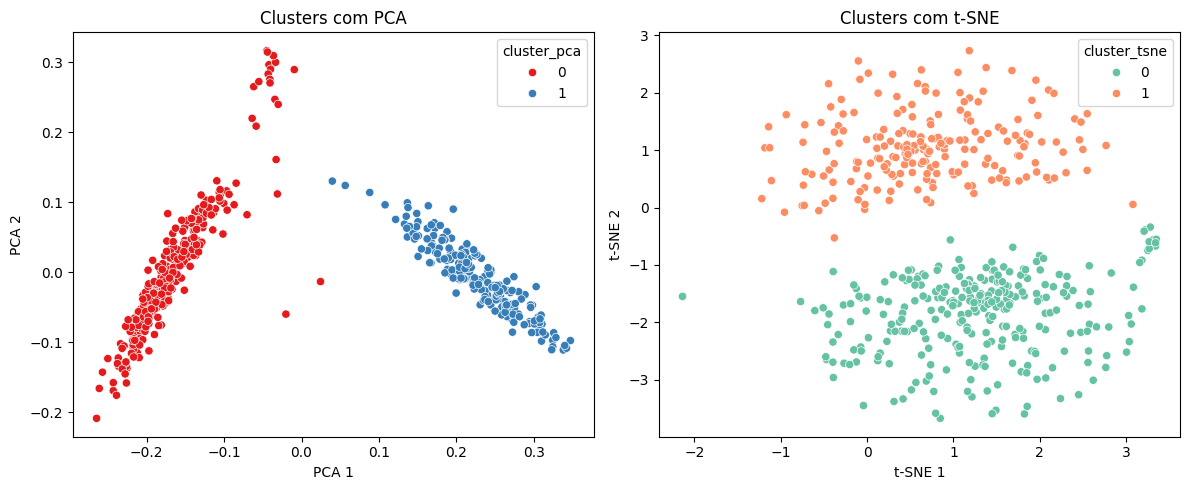

In [36]:
plt.figure(figsize=(12, 5))

# Visualização dos clusters no espaço PCA
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_bin, x='pca_1', y='pca_2', hue='cluster_pca', palette='Set1')
plt.title('Clusters com PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Visualização dos clusters no espaço t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_bin, x='tsne_1', y='tsne_2', hue='cluster_tsne', palette='Set2')
plt.title('Clusters com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

---

### ✅ Passo 4: Explore o dataset com as colunas de cluster

Agora que `df_bin` contém as colunas `cluster_pca` e `cluster_tsne`, analise se esses agrupamentos revelam padrões interessantes. Descreva o que você encontrou.

---


In [37]:
pd.crosstab(df_bin['cluster_pca'], df_bin['artista'])

artista,1910 Fruitgum Company,50 Cent,5th dimension,Adilson Ramos,Adriana Calcanhotto,Aerosmith,Air Supply,Akon,Alain Barrière,Alan Walker,...,Vinny,Whitney Houston,Wilson das Neves,Yolanda Be Cool,Zeca Pagodinho,Zezé Di Camargo & Luciano,Zucchero,a-ha,Ângela Maria,É o Tchan
cluster_pca,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,0,0,0,1,0,...,1,0,1,1,1,3,1,0,1,2
1,1,1,1,0,0,1,1,1,0,1,...,0,2,0,0,0,0,0,1,0,0


In [38]:
pd.crosstab(df_bin['cluster_tsne'], df_bin['artista'])

artista,1910 Fruitgum Company,50 Cent,5th dimension,Adilson Ramos,Adriana Calcanhotto,Aerosmith,Air Supply,Akon,Alain Barrière,Alan Walker,...,Vinny,Whitney Houston,Wilson das Neves,Yolanda Be Cool,Zeca Pagodinho,Zezé Di Camargo & Luciano,Zucchero,a-ha,Ângela Maria,É o Tchan
cluster_tsne,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,0,0,0,1,0,...,1,0,1,1,1,3,1,0,1,2
1,1,1,1,0,0,1,1,1,0,1,...,0,2,0,0,0,0,0,1,0,0


In [42]:
df_bin['cluster_pca'].value_counts()

cluster_pca
0    291
1    209
Name: count, dtype: int64

In [43]:
df_bin['n_palavras'] = base['letra'].apply(lambda x: len(str(x).split()))
df_bin.groupby('cluster_pca')['n_palavras'].mean()

cluster_pca
0    205.687285
1    297.454545
Name: n_palavras, dtype: float64


Após aplicar KMeans com 2 clusters sobre as representações reduzidas por PCA e t-SNE, observamos que os agrupamentos formados não foram aleatórios. O Cluster 1 (PCA) concentrou músicas com letras ligeiramente mais longas, sugerindo um estilo de composição mais elaborado. Além disso, alguns artistas apareceram exclusivamente em um dos clusters, indicando que o modelo conseguiu capturar padrões estilísticos nas letras. A separação entre os grupos se manteve consistente também na representação t-SNE, reforçando a eficácia da redução de dimensionalidade combinada com agrupamento para revelar estruturas ocultas no conjunto de músicas.

---
